![seaborn](https://raw.githubusercontent.com/mwaskom/seaborn/master/doc/_static/logo-wide-lightbg.svg)

High level plotting API wrapped around matplotlib to provide easy plot solution to statistitians and data scientists.

- Initial release: 2013
- Current version: [![PyPI Version](https://img.shields.io/pypi/v/seaborn.svg)](https://pypi.org/project/seaborn/)
- Repository: https://github.com/mwaskom/seaborn

Most of the statistic analysis invovles visualizing data in multiple plots (a.k.a joint plots), along multiple axes.
The plotting package `seaborn` provides some high-level API that allows data scientists to visualize the data with a few commonda instead of length customized matplotib  functions.

- Pros
  - beautiful built-in color pallete
  - greate integration with `pandas.DataFrame`
  - one liner to generate complicated joint plots
- Cons
  - customizing plot elements can be difficult (doable, but difficult)
  - using `seaborn` without a DataFrame can be difficult
  - some built-in plot types does not work well with large dataset
    - this can be bypassed by passing the data through a sampler or datashader, but there are other plotting libraries that provide this feature by default.

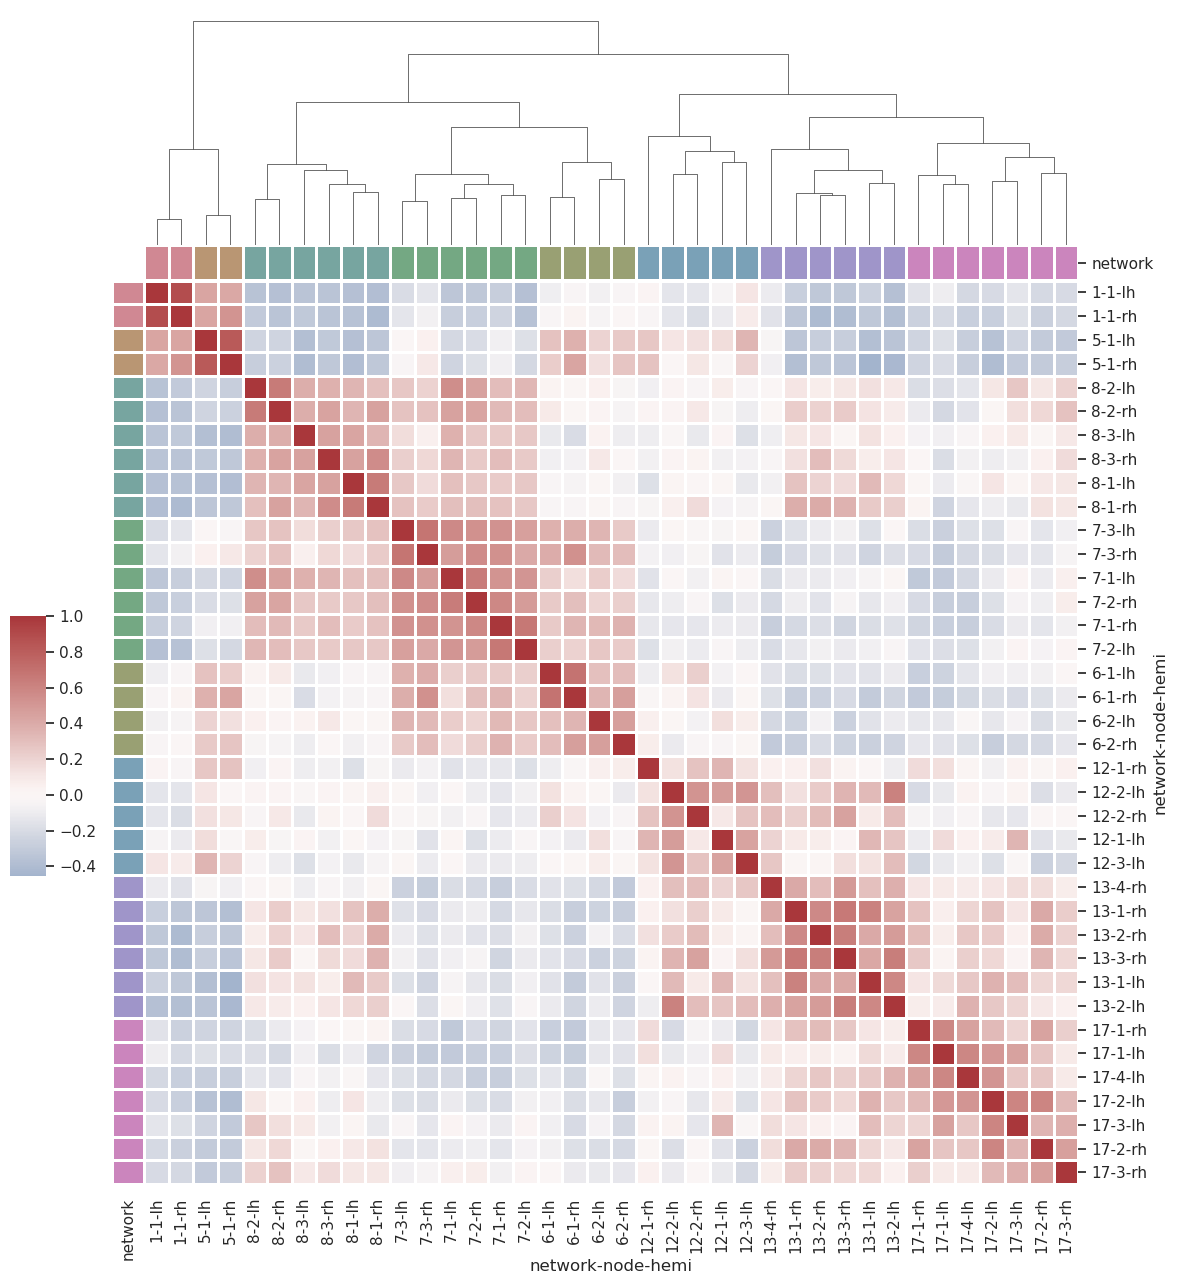

In [2]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

Since it is using `matplotlib` internally, it is possible to invoke `ipympl` to provide some limited interactivity.

In [3]:
%matplotlib ipympl

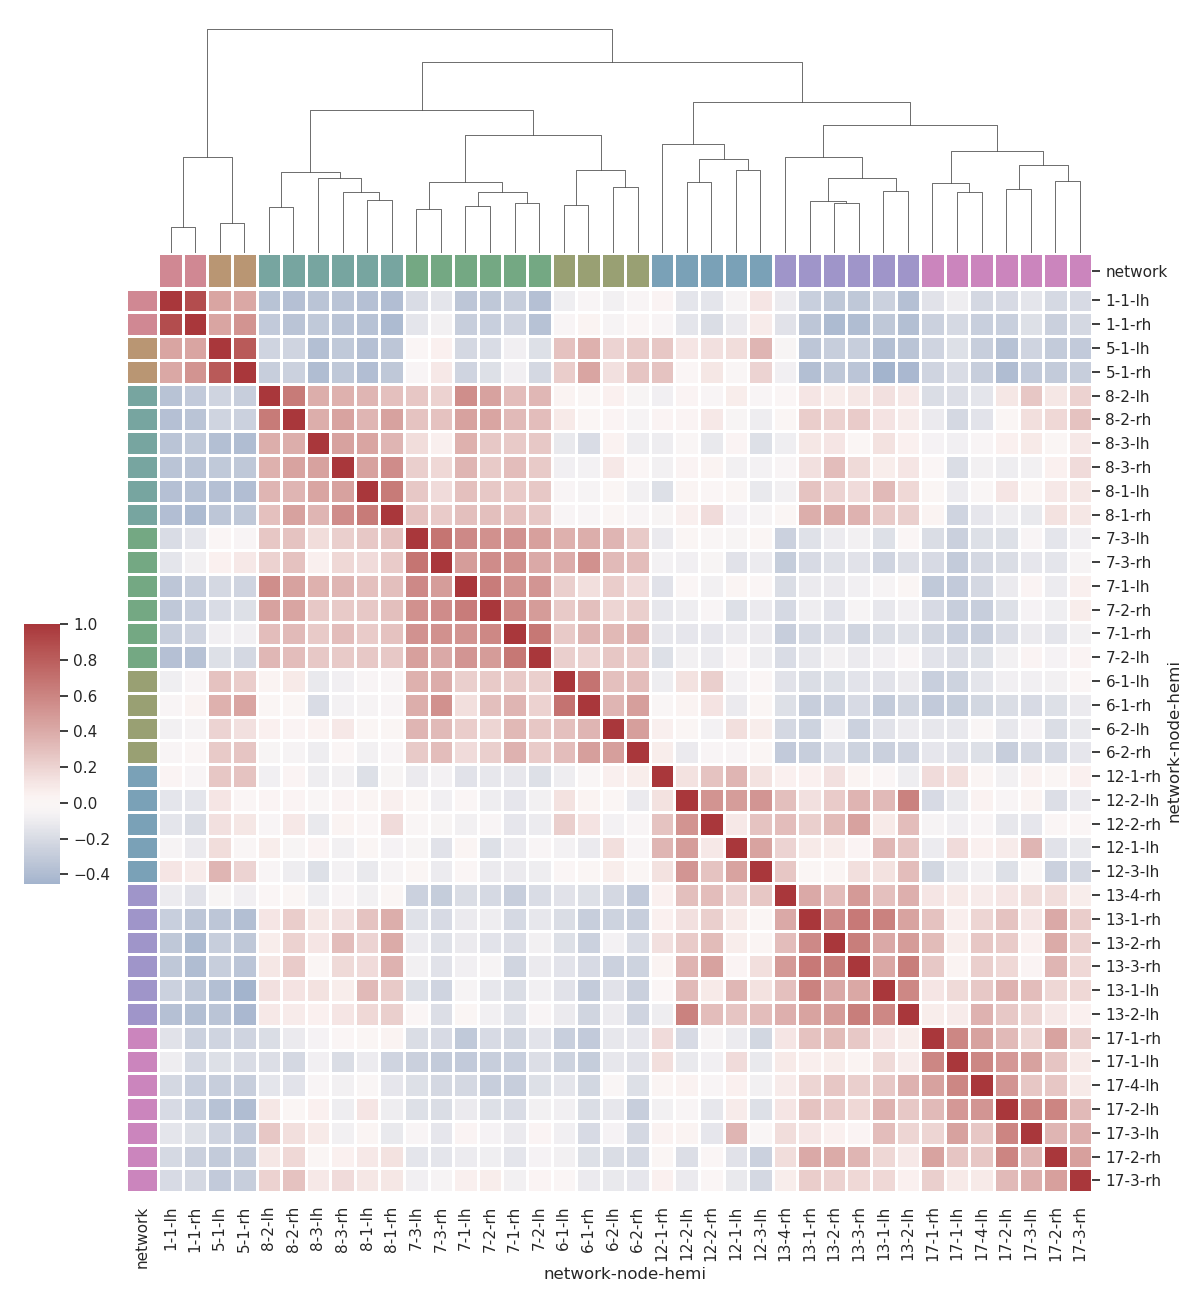

In [4]:
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

The main selling point of `seaborn` would be that you can easily map additional axis as

- color (hue)
- glyph size (size)

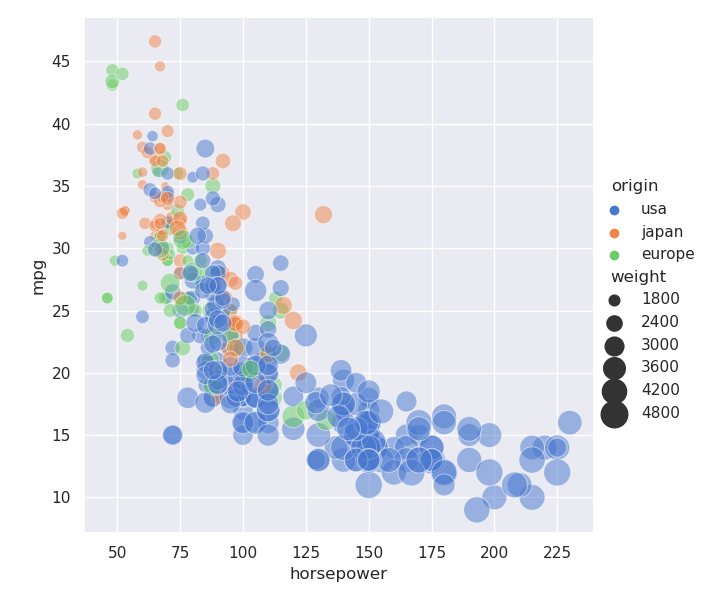

In [5]:
# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

another common tool would be the matrix plot to show case the pair wise relationship

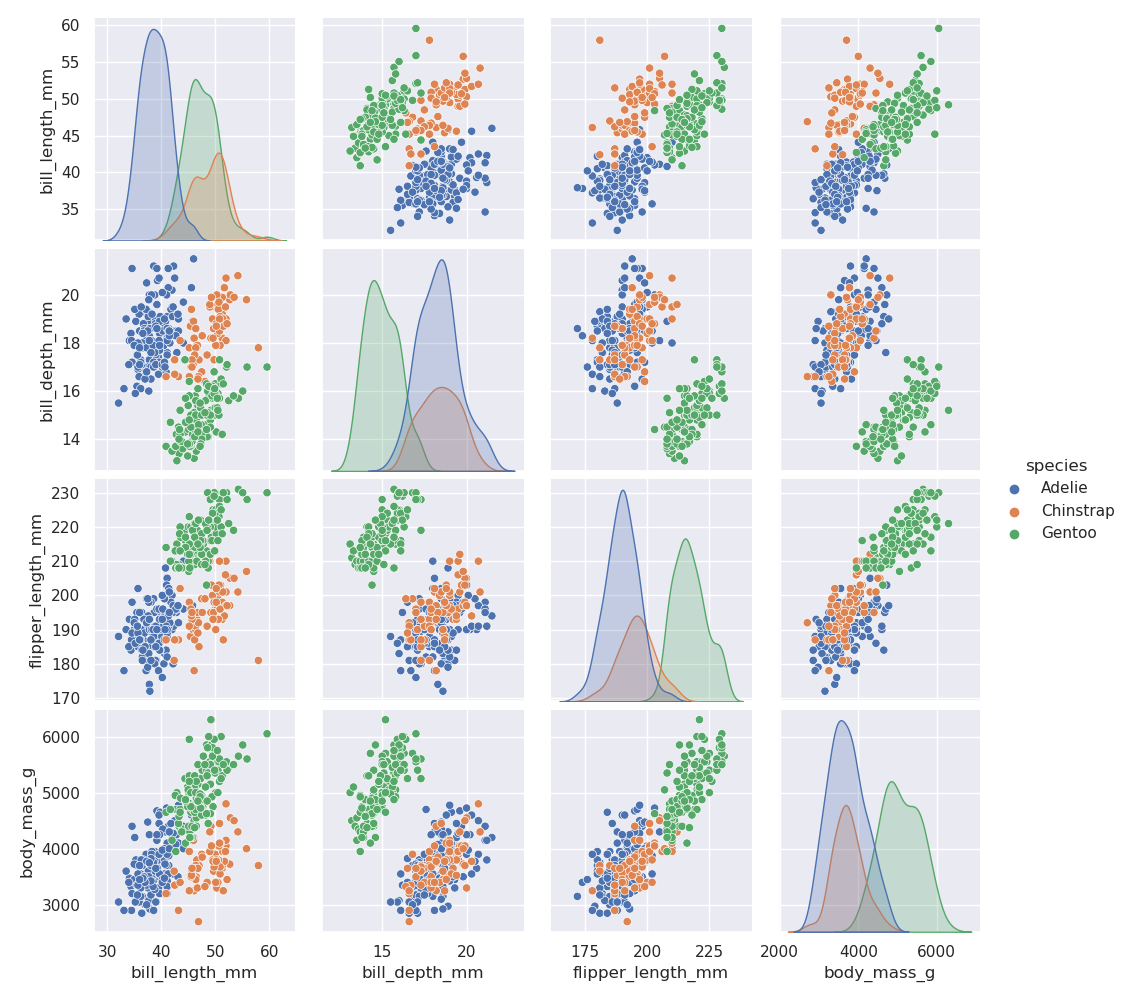

In [6]:
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

Fundamentally, `seaborn` is a specialized plotting library that aims at the data scientist community, and it is best used to

- explore relationship of multi-dimensional data via __static__ 2D plots
- generate camera-ready publication plots/figures